# <font color='white'><span style='background:darkcyan'> ***P6 : LAPAGE*** <span><br>

In [1]:
#installation librairie pingouin pour test anova
!pip install pingouin

In [2]:
# Importation Librairies
import datetime as dt
import pandas as pd
import numpy as np
import scipy.stats as st
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Chargement des données
cust = pd.read_csv('customers.csv')
prod = pd.read_csv('products.csv')
trans = pd.read_csv('transactions.csv')

In [4]:
# Classe couleur pour l'affichage
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

## <font color='blue'>***Statistiques descriptives et nettoyages des données***

> ### <font color='lateorange'>***a. Données customers***

In [5]:
# Aperçu 
cust.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [6]:
# Valeurs nulls
cust.info() # Pas de valeurs nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [7]:
# Outliers 
cust.describe() # RAS

,birth
count,8623.000000
mean,1978.280877
std,16.919535
min,1929.000000
25%,1966.000000
50%,1979.000000
75%,1992.000000
max,2004.000000


In [8]:
# Tester l'unicité de la clé client_id
cust.duplicated(subset=['client_id']).sum() # la clé est bien unique

0

In [9]:
# Créer une colonne âge pour chaque client
cust['age'] = (2023 - cust['birth'])
cust.head()

,client_id,sex,birth,age
0,c_4410,f,1967,56
1,c_7839,f,1975,48
2,c_1699,f,1984,39
3,c_5961,f,1962,61
4,c_5320,m,1943,80


In [10]:
# Ages
cust["age"].unique()

array([56, 48, 39, 61, 80, 30, 45, 52, 41, 78, 20, 64, 46, 69, 36, 23, 31,
       60, 65, 29, 87, 37, 81, 53, 66, 55, 21, 19, 44, 49, 59, 72, 86, 42,
       58, 63, 27, 40, 33, 68, 35, 32, 51, 43, 34, 47, 38, 70, 25, 67, 75,
       50, 54, 85, 28, 71, 74, 24, 22, 84, 73, 57, 88, 82, 62, 26, 79, 94,
       76, 77, 91, 92, 90, 93, 83, 89])

In [11]:
# l'âge minimal
cust["age"].min()

19

In [12]:
# les Ages minimals (18 ans)
cust[cust["age"] == cust["age"].min()]

,client_id,sex,birth,age
43,c_1046,m,2004,19
71,c_3081,m,2004,19
95,c_1418,f,2004,19
101,c_3338,m,2004,19
106,c_1774,f,2004,19
...,...,...,...,...
8584,c_461,f,2004,19
8594,c_294,m,2004,19
8598,c_5339,f,2004,19
8606,c_4077,m,2004,19


### <span style='font-family:serif'><font color='blue'> *Ici on peut conclure qu'il faut être majeur pour pouvoir faire un achat de livre.*<br>

In [13]:
# Age maximal
cust["age"].max()

94

In [14]:
# les Ages maximals (93 ans)
cust[cust["age"] == cust["age"].max()]

,client_id,sex,birth,age
418,c_5302,m,1929,94
2491,c_8362,f,1929,94
4569,c_577,m,1929,94


In [15]:
# Moyenne d'âge des clients
cust["age"].unique().mean()

56.5

In [16]:
# Description de l'âge
cust["age"].describe()

count    8623.000000
mean       44.719123
std        16.919535
min        19.000000
25%        31.000000
50%        44.000000
75%        57.000000
max        94.000000
Name: age, dtype: float64

> ### <font color='lateorange'>***b. Données products***

In [17]:
# Aperçu
prod.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [18]:
# Valeurs nulls
prod.info() # Pas de valeurs nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


In [19]:
# Outliers
prod.describe()

,price,categ
count,3287.000000,3287.000000
mean,21.856641,0.370246
std,29.847908,0.615387
min,-1.000000,0.000000
25%,6.990000,0.000000
50%,13.060000,0.000000
75%,22.990000,1.000000
max,300.000000,2.000000


### <span style='font-family:serif'><font color='blue'> ***Ici la valeur <font color='red'> -1 <font color='blue'> dans 'price' est très suspecte. Nous allons donc approfondir sur ce point.***<br>

In [20]:
#  La ligne dont le price vaut -1
prod_out = prod.loc[prod['price']<=0]
prod_out

,id_prod,price,categ
731,T_0,-1.0,0


In [21]:
# Affiche le produit T_0
prod.loc[prod['id_prod']=='T_0',:]

,id_prod,price,categ
731,T_0,-1.0,0


### <span style='font-family:serif'><font color='blue'> *Ce qui nous donne l'id_prod : <font color='red'> T_0 <font color='blue'> et un livre de categ <font color='red'> 0 <font color='blue'> qui coûte <font color='red'> -1 €*<br>

In [22]:
# Supprimer la ligne du produit T_0
prod = prod.loc[prod['id_prod']!='T_0',:]
prod

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3282,2_23,115.99,2
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1


> ### <font color='lateorange'>***c. Données transactions***

In [23]:
# Aperçu du df
trans.head()

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


In [24]:
# Le type des variables
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


In [25]:
# changer le format de la date
#trans['date'] = pd.to_datetime(trans['date'].unique())

### <span style='font-family:serif'><font color='blue'> ***Ici le type de la variable "date" est <font color='red'>'object'<font color='blue'>. En essayant de le changer en <font color='red'>'datetime'<font color='blue'>, on remarque (dans l'erreur) que certaines lignes de la colonne "date" prennent un autre format : <font color='green'>"test_"<font color='blue'>.*** <br>

In [26]:
# Aperçu des lignes ayant une date qui ne suit pas la norme (avec test_* d'après l'erreur) 
trans_test = trans.loc[trans['date']=='test_2021-03-01 02:30:02.237419']
trans_test

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
52424,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
130188,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
168341,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
185962,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_1
311604,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_1


### <span style='font-family:serif'><font color='blue'> ***On peut vérifier et conclure que toutes les produits <font color='red'>T_0 <font color='blue'>avec des session_id <font color='red'> s_0 <font color='blue'> et un client_id <font color='red'> ct_0 <font color='blue'> sont tous des <font color='darkcyan'> tests <font color='blue'> et ont des dates sous format <font color='red'> test_...***<br>

In [27]:
# Afficher tout les achats des produits T_0
trans.loc[trans['id_prod']=='T_0',:] # Ils correspondent aux dates tests

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
...,...,...,...,...
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


In [28]:
# Supprimer les lignes test (T_0)
trans = trans.loc[trans['id_prod']!='T_0',:]
trans

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227


In [29]:
# Format de "date" en datetime
trans['date'] = pd.to_datetime(trans['date'])

In [30]:
# Outliers
#trans.info()

***
***

## <font color='blue'>***Fusions des données***<br>

In [31]:
#cust.head()
#prod.head()
#trans.head()

In [32]:
# Fonction qui teste la validation d'une colonne en tant que clé primaire
def testerCle(df, colonnes):
    """Fonction qui prend en arguments un dataframe et les colonnes qui composent la clé primaire à tester."""

    # On compare la taille du dataframe avant et après dédoublonnage 
    if df.size == df.drop_duplicates(colonnes).size :
        print(color.BOLD + color.BLUE + "La clé n'est pas présente plusieurs fois dans le dataframe.")
        print(color.BOLD + color.GREEN + "Elle peut donc être utilisée comme clé primaire.".format(colonnes))
    else :
        print(color.BOLD + color.BLUE + "La clé est présente plusieurs fois dans le dataframe.")
        print(color.BOLD + color.RED + "Elle ne peut donc pas être utilisée comme clé primaire.".format(colonnes))
    
    # On renvoie également le comptage
    print(color.BOLD + color.BLUE + "Le dataframe est de la forme : " + str(df.shape) + " (lignes, colonnes)")

In [33]:
#verification clé produit
testerCle(prod,'id_prod')

La clé n'est pas présente plusieurs fois dans le dataframe.
Elle peut donc être utilisée comme clé primaire.
Le dataframe est de la forme : (3286, 3) (lignes, colonnes)


In [34]:
#verification clé client
testerCle(cust,'client_id')

La clé n'est pas présente plusieurs fois dans le dataframe.
Elle peut donc être utilisée comme clé primaire.
Le dataframe est de la forme : (8623, 4) (lignes, colonnes)


In [35]:
# Liaison entre transactions et productions
trans_prod = pd.merge(trans, prod,  on='id_prod', how='left')
trans_prod.head()

,id_prod,date,session_id,client_id,price,categ
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,15.99,1.0
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,7.99,0.0
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,69.99,2.0
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,4.99,0.0


In [36]:
# Liaison entre trans_prod et cust
data = pd.merge(trans_prod, cust, on='client_id', how='left')
data.head()

,id_prod,date,session_id,client_id,price,categ,sex,birth,age
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,f,1986,37
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,15.99,1.0,m,1988,35
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,7.99,0.0,f,1968,55
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,69.99,2.0,m,2000,23
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,4.99,0.0,m,1980,43


### <span style='font-family:serif'><font color='blue'>***Nous partons généralement d'une jointure à gauche (en plaçant transaction à gauche) afin de garder les lignes de transactions (dont on a besoin) de matcher les autres colonnes sur elle.*** <br>

### <font color='blue'>***Pré-traitement du data (final après fusions)***<br>

In [37]:
#verification des valeurs Nan
data.isna().sum()

id_prod         0
date            0
session_id      0
client_id       0
price         221
categ         221
sex             0
birth           0
age             0
dtype: int64

In [38]:
# Tester les Doublons
data.loc[data[['id_prod','price','categ','date','session_id','client_id','sex','birth','age']].duplicated(keep=False),:]

,id_prod,date,session_id,client_id,price,categ,sex,birth,age


In [39]:
# Doublons sur date (tests)
data.loc[data[['date']].duplicated(keep=False),:]

,id_prod,date,session_id,client_id,price,categ,sex,birth,age


In [40]:
# information sur le df data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679331
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   date        679332 non-null  datetime64[ns]
 2   session_id  679332 non-null  object        
 3   client_id   679332 non-null  object        
 4   price       679111 non-null  float64       
 5   categ       679111 non-null  float64       
 6   sex         679332 non-null  object        
 7   birth       679332 non-null  int64         
 8   age         679332 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 51.8+ MB


In [41]:
# categ en entier
#data['categ'] = data['categ'].astype(int) # erreurs car la colonne catégorie contient des valeurs nulls

# liste des valeurs de categ
data.categ.unique()

array([ 0.,  1.,  2., nan])

In [42]:
# Les valeurs nulls dans catégorie
data.loc[data['categ'].isna(),:]

,id_prod,date,session_id,client_id,price,categ,sex,birth,age
2633,0_2245,2022-09-23 07:22:38.636773,s_272266,c_4746,NaN,NaN,m,1940,83
10103,0_2245,2022-07-23 09:24:14.133889,s_242482,c_6713,NaN,NaN,f,1963,60
11723,0_2245,2022-12-03 03:26:35.696673,s_306338,c_5108,NaN,NaN,m,1978,45
15670,0_2245,2021-08-16 11:33:25.481411,s_76493,c_1391,NaN,NaN,m,1991,32
16372,0_2245,2022-07-16 05:53:01.627491,s_239078,c_7954,NaN,NaN,m,1973,50
...,...,...,...,...,...,...,...,...,...
669533,0_2245,2021-08-25 09:06:03.504061,s_80395,c_131,NaN,NaN,m,1981,42
670484,0_2245,2022-03-06 19:59:19.462288,s_175311,c_4167,NaN,NaN,f,1979,44
671088,0_2245,2022-05-16 11:35:20.319501,s_209381,c_4453,NaN,NaN,m,1981,42
675480,0_2245,2022-02-11 09:05:43.952857,s_163405,c_1098,NaN,NaN,m,1986,37


In [43]:
# les achats du produit 0_2245
data.loc[data['id_prod'] == '0_2245',:]

,id_prod,date,session_id,client_id,price,categ,sex,birth,age
2633,0_2245,2022-09-23 07:22:38.636773,s_272266,c_4746,NaN,NaN,m,1940,83
10103,0_2245,2022-07-23 09:24:14.133889,s_242482,c_6713,NaN,NaN,f,1963,60
11723,0_2245,2022-12-03 03:26:35.696673,s_306338,c_5108,NaN,NaN,m,1978,45
15670,0_2245,2021-08-16 11:33:25.481411,s_76493,c_1391,NaN,NaN,m,1991,32
16372,0_2245,2022-07-16 05:53:01.627491,s_239078,c_7954,NaN,NaN,m,1973,50
...,...,...,...,...,...,...,...,...,...
669533,0_2245,2021-08-25 09:06:03.504061,s_80395,c_131,NaN,NaN,m,1981,42
670484,0_2245,2022-03-06 19:59:19.462288,s_175311,c_4167,NaN,NaN,f,1979,44
671088,0_2245,2022-05-16 11:35:20.319501,s_209381,c_4453,NaN,NaN,m,1981,42
675480,0_2245,2022-02-11 09:05:43.952857,s_163405,c_1098,NaN,NaN,m,1986,37


In [44]:
# Liste des id_prod dont valeurs nulls
(data.loc[data['categ'].isna(),:])['id_prod'].unique()

array(['0_2245'], dtype=object)

### <span style='font-family:serif'><font color='blue'> *On peut observer que tous les produits <font color='red'>'0_2245'<font color='blue'> ont des valeurs nulls dans 'price' et de 'categ'.<br><span style='font-family:serif'><font color='blue'>Cela peut signifier qu'il y a un produit dans trans qui n'est pas dans prod.*<br>

In [45]:
# Remplacer les valeurs nulls par 0
data['categ'] = data['categ'].fillna(0)
data['price'] = data['price'].fillna(data['price'].mean())

# Vérification
data.loc[data['id_prod']=='0_2245',:]

,id_prod,date,session_id,client_id,price,categ,sex,birth,age
2633,0_2245,2022-09-23 07:22:38.636773,s_272266,c_4746,17.454773,0.0,m,1940,83
10103,0_2245,2022-07-23 09:24:14.133889,s_242482,c_6713,17.454773,0.0,f,1963,60
11723,0_2245,2022-12-03 03:26:35.696673,s_306338,c_5108,17.454773,0.0,m,1978,45
15670,0_2245,2021-08-16 11:33:25.481411,s_76493,c_1391,17.454773,0.0,m,1991,32
16372,0_2245,2022-07-16 05:53:01.627491,s_239078,c_7954,17.454773,0.0,m,1973,50
...,...,...,...,...,...,...,...,...,...
669533,0_2245,2021-08-25 09:06:03.504061,s_80395,c_131,17.454773,0.0,m,1981,42
670484,0_2245,2022-03-06 19:59:19.462288,s_175311,c_4167,17.454773,0.0,f,1979,44
671088,0_2245,2022-05-16 11:35:20.319501,s_209381,c_4453,17.454773,0.0,m,1981,42
675480,0_2245,2022-02-11 09:05:43.952857,s_163405,c_1098,17.454773,0.0,m,1986,37


***
***

# <font color='blue'><span style='font-family:serif'>***PARTIE 1 : Demandes d'Antoine***

> ### <font color='lateorange'>***1. Analyses autour du chiffre d'affaire***

In [46]:
# Montant total des achats
ca = data['price'].sum()
print(color.BOLD + color.BLUE + "Le montant total des achats est de " + color.RED 
      +  f"{round(ca,2):,}" + color.BLUE + " €")

Le montant total des achats est de 11,857,586.18 €


In [47]:
# La taille de panier moyen
moyen_achats = data['price'].mean()
print(color.BOLD + color.BLUE + "La taille moyenne du panier est de " + color.RED 
      +  f"{round(moyen_achats,2):,}" + color.BLUE + " €\n")

La taille moyenne du panier est de 17.45 €



In [48]:
# Créer des colonnes 'year' et 'month' afin de simplifier l'affichage du graphe
data['day'] = data['date'].dt.day
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month_name()

# Convertir ces 2 colonnes en 'string' afin de les concaténer dans une nouvelle colonne 'ym'
data['day'] = data['day'].astype('int') # En entier pour pouvoir trier par jour 
data['year'] = data['year'].astype('str')
data['month'] = data['month'].astype('str')
data['ym'] = data['year'] + data['month']
data = data.sort_values('date')
data.head()

,id_prod,date,session_id,client_id,price,categ,sex,birth,age,day,year,month,ym
480501,0_1259,2021-03-01 00:01:07.843138,s_1,c_329,11.99,0.0,f,1967,56,1,2021,March,2021March
428350,0_1390,2021-03-01 00:02:26.047414,s_2,c_664,19.37,0.0,m,1960,63,1,2021,March,2021March
462563,0_1352,2021-03-01 00:02:38.311413,s_3,c_580,4.50,0.0,m,1988,35,1,2021,March,2021March
488153,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912,6.55,0.0,f,1989,34,1,2021,March,2021March
438944,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033,16.49,0.0,f,1956,67,1,2021,March,2021March


In [49]:
# df pour traiter le CA par mois
ca_m = data[['date','price','categ','month','ym']]
ca_m.head()

,date,price,categ,month,ym
480501,2021-03-01 00:01:07.843138,11.99,0.0,March,2021March
428350,2021-03-01 00:02:26.047414,19.37,0.0,March,2021March
462563,2021-03-01 00:02:38.311413,4.50,0.0,March,2021March
488153,2021-03-01 00:04:54.559692,6.55,0.0,March,2021March
438944,2021-03-01 00:05:18.801198,16.49,0.0,March,2021March


In [50]:
# CA par mois
ca_mois = ca_m.groupby(pd.Grouper(key='date',freq='M')).agg({'price':'sum'}).reset_index()
ca_mois.head()

,date,price
0,2021-03-31,482597.702961
1,2021-04-30,476353.666829
2,2021-05-31,493083.108188
3,2021-06-30,484210.743414
4,2021-07-31,482905.219094


In [51]:
# ReCréer des colonnes 'year' et 'month' afin de simplifier l'affichage du graphe
ca_mois['year'] = ca_mois['date'].dt.year
ca_mois['month'] = ca_mois['date'].dt.month_name()

# Convertir ces 2 colonnes en 'string' afin de les concaténer dans une nouvelle colonne 'ym'
ca_mois['year'] = ca_mois['year'].astype('str')
ca_mois['month'] = ca_mois['month'].astype('str')
ca_mois['ym'] = ca_mois['year'] + ca_mois['month']
ca_mois.head()

,date,price,year,month,ym
0,2021-03-31,482597.702961,2021,March,2021March
1,2021-04-30,476353.666829,2021,April,2021April
2,2021-05-31,493083.108188,2021,May,2021May
3,2021-06-30,484210.743414,2021,June,2021June
4,2021-07-31,482905.219094,2021,July,2021July


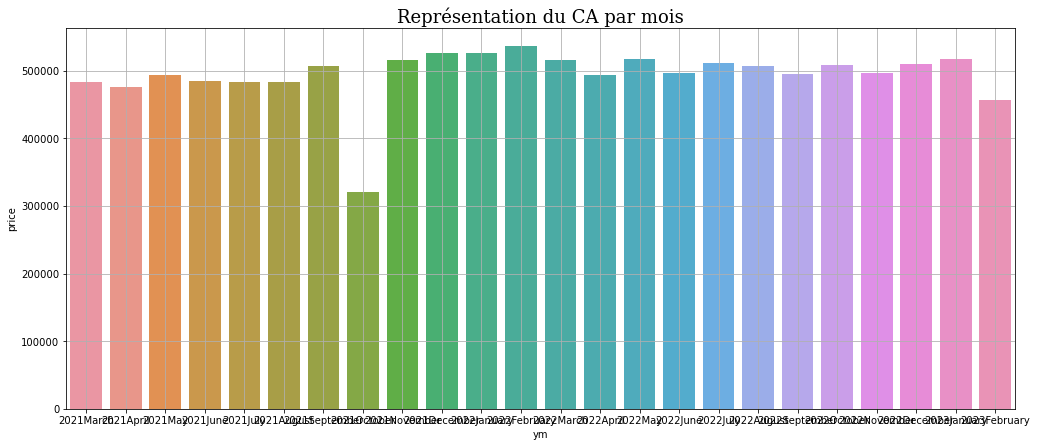

In [52]:
plt.figure(figsize=(17,7))
sns.barplot(data=ca_mois, x='ym', y='price', ci=None)
plt.rc('xtick', labelsize=5)
plt.grid()
plt.title("Représentation du CA par mois", fontname='Serif', fontsize=18)
plt.show()

### <span style='font-family:serif'><font color='red'>*Remarque:* <font color='blue'> *On aperçoit une baisse du chiffre d'affaire sur le mois d'octobre de l'année 2021 (<font color='darkslateblue'>2021-11-30<font color='blue'>). Creusons un peu plus sur ce mois.*</br>

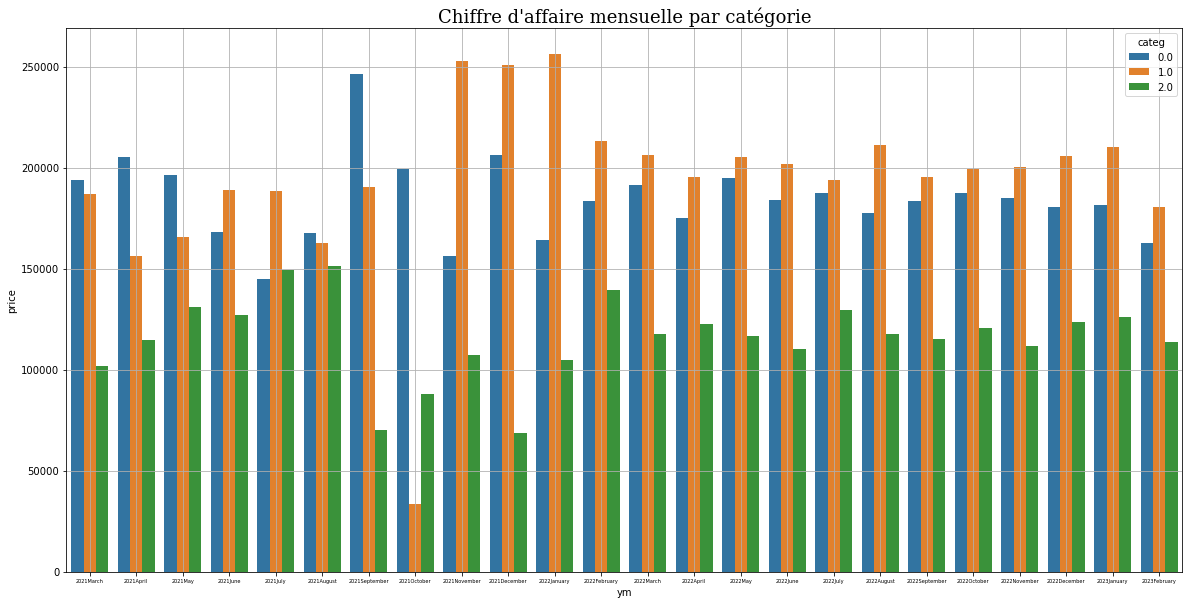

In [53]:
# Focus sur le Chiffre d'affaire du mois d'octobre par catégorie
# CA par mois par catégorie
plt.figure(figsize=(20,10))
sns.barplot(data=data, x='ym', y='price', ci=None, hue='categ', estimator=sum)
plt.grid()
plt.rc('xtick', labelsize=7)
plt.title("Chiffre d'affaire mensuelle par catégorie", fontname='Serif', fontsize=18)
plt.show()

### <span style='font-family:serif'><font color='blue'> *On peut voir clairement, ici, que sur le mois d'octobre 2021 , le chiffre d'affaire de la <font color='darkslateblue'>catégorie 1 est en baisse<font color='blue'> par rapport aux autres mois. C'est ce qui est la cause de la chutte du chiffre d'affaire à cette période.*<br>

In [54]:
# DF du mois d'octobre 21
df_oct21 = data[data['ym'] == '2021October']
df_oct21.head()

,id_prod,date,session_id,client_id,price,categ,sex,birth,age,day,year,month,ym
393773,0_1145,2021-10-01 00:00:23.722317,s_98170,c_5907,6.99,0.0,f,1991,32,1,2021,October,2021October
47979,1_622,2021-10-01 00:03:07.095422,s_98169,c_7614,17.41,1.0,m,1995,28,1,2021,October,2021October
342811,1_202,2021-10-01 00:03:16.664480,s_98171,c_4492,19.96,1.0,f,1980,43,1,2021,October,2021October
15777,0_2268,2021-10-01 00:06:04.960675,s_98172,c_2588,17.57,0.0,m,1989,34,1,2021,October,2021October
7427,0_1421,2021-10-01 00:07:50.987959,s_98173,c_5953,19.99,0.0,m,1986,37,1,2021,October,2021October


In [55]:
# Le mois d'octobre 2021 par jour
df_oct21_jr = df_oct21.groupby(['day','categ']).agg({'price':'sum'})
df_oct21_jr = df_oct21_jr.reset_index()
df_oct21_jr.head()

,day,categ,price
0,1,0.0,6950.50
1,1,1.0,7003.79
2,1,2.0,3104.05
3,2,0.0,7141.01
4,2,2.0,2041.12


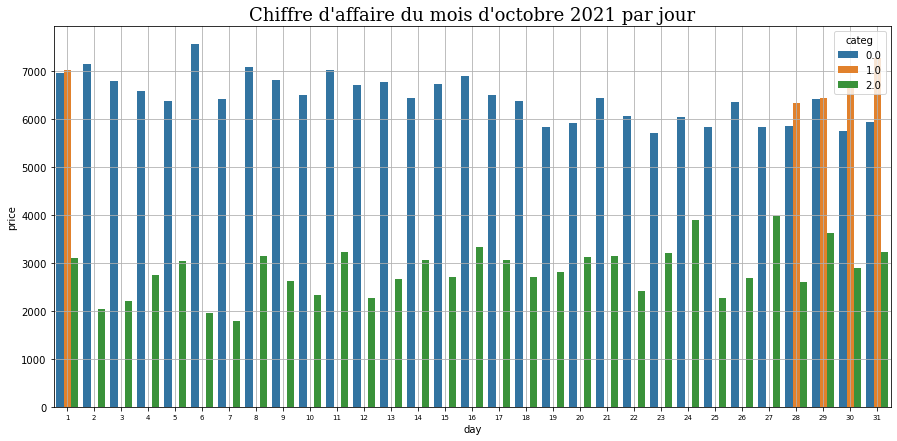

In [56]:
# Représentation graphique
plt.figure(figsize=(15,7))
sns.barplot(data=df_oct21_jr.sort_values('day',ascending=True), x="day", y='price', hue='categ', estimator=sum)
plt.grid()
plt.title("Chiffre d'affaire du mois d'octobre 2021 par jour", fontname='Serif', fontsize=18)
plt.show()

### <span style='font-family:serif'><font color='blue'> *D'après ce graphe on peut voir clairement qu'à partir 2 oct au 27 oct 2021, aucun produit 1 n'a été vendu. C'est ce qui a causé la baisse durant ce mois*<br>

In [57]:
# df regroupant les CA par client
ca_cl = data.groupby('client_id')['price'].sum()
ca_cl = ca_cl.reset_index().sort_values('price',ascending=False)
ca_cl.head(7)

,client_id,price
677,c_1609,324033.350000
4388,c_4958,289760.340000
6337,c_6714,153703.648641
2724,c_3454,113690.294320
2513,c_3263,5276.870000
634,c_1570,5271.620000
2108,c_2899,5214.050000


### <span style='font-family:serif'><font color='blue'> *On peu apercevoir clairement qu'il y a 4 gros clients qui sortent du lot. Il pourrait s'agir des clients professionnels tandis que le reste, des clients particuliers. Nous allons donc créer une colonne pour indiquer le type des clients.*<br>

In [58]:
# Créer la colonne type de client
ca_cl['type_client'] = ["pro" if p >=100000 else "lambda" for p in ca_cl['price']]
ca_cl.head()

,client_id,price,type_client
677,c_1609,324033.350000,pro
4388,c_4958,289760.340000,pro
6337,c_6714,153703.648641,pro
2724,c_3454,113690.294320,pro
2513,c_3263,5276.870000,lambda


In [59]:
# Ne garder que "client_id" et "prix"
ca_cl2 = ca_cl[['client_id','type_client']]

# Jointure entre data et prix_cl pour rajouter "type_client" sur le df final
datafinal = pd.merge(data, ca_cl2, on='client_id', how='left')
datafinal.head()

,id_prod,date,session_id,client_id,price,categ,sex,birth,age,day,year,month,ym,type_client
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329,11.99,0.0,f,1967,56,1,2021,March,2021March,lambda
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664,19.37,0.0,m,1960,63,1,2021,March,2021March,lambda
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580,4.50,0.0,m,1988,35,1,2021,March,2021March,lambda
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912,6.55,0.0,f,1989,34,1,2021,March,2021March,lambda
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033,16.49,0.0,f,1956,67,1,2021,March,2021March,lambda


In [60]:
# Moyenne d'achats par rapport sexes
prix_sex = datafinal.groupby('sex')['price'].mean()
prix_sex = prix_sex.reset_index()
prix_sex

,sex,price
0,f,17.321781
1,m,17.586780


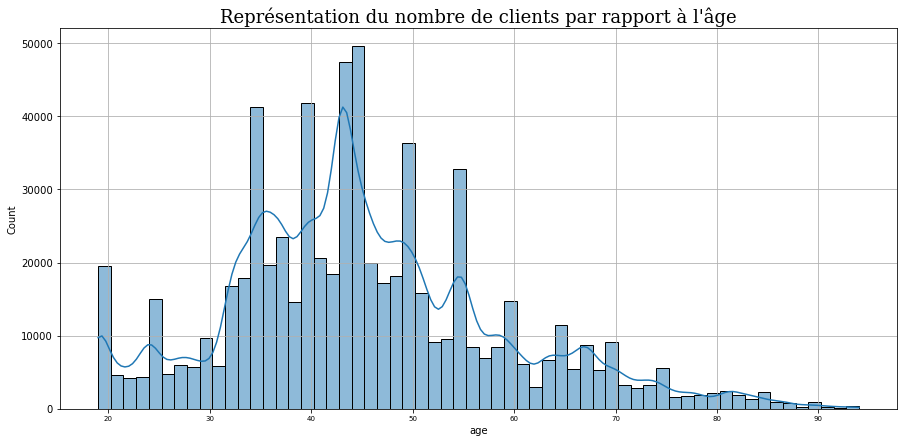

In [61]:
# Histogramme Nombre de clients par rapport à l'âge
plt.figure(figsize=(15,7))
sns.histplot(data=datafinal, x='age', bins=60, kde=True)
plt.grid()
plt.title("Représentation du nombre de clients par rapport à l'âge", fontname='Serif', fontsize=18)
plt.show()

### <span style='font-family:serif'><font color='blue'> *Ce graphe nous montre que le plus grand nombre des clients ont des âges qui tournent autour de 40 et 50 ans.*<br>

> ### <font color='lateorange'>***2. Décomposition en moyenne mobile***

>> #### <font color='darkslateblue'> ***Moyenne mobile par semaine***

In [62]:
# Indexer la colonne date
ca_m = ca_m.set_index('date')
ca_m

,price,categ,month,ym
date,,,,
2021-03-01 00:01:07.843138,11.99,0.0,March,2021March
2021-03-01 00:02:26.047414,19.37,0.0,March,2021March
2021-03-01 00:02:38.311413,4.50,0.0,March,2021March
2021-03-01 00:04:54.559692,6.55,0.0,March,2021March
2021-03-01 00:05:18.801198,16.49,0.0,March,2021March
...,...,...,...,...
2023-02-28 23:49:03.148402,21.92,1.0,February,2023February
2023-02-28 23:51:29.318531,48.99,2.0,February,2023February
2023-02-28 23:53:18.929676,26.99,1.0,February,2023February


In [63]:
# Sommer par jour les prix
mm_jour = ca_m.resample('D').sum()
mm_jour.head()

,price,categ
date,,
2021-03-01,16582.674773,427.0
2021-03-02,15503.904773,362.0
2021-03-03,15198.690000,360.0
2021-03-04,15196.070000,383.0
2021-03-05,17471.370000,433.0


In [64]:
# Moyenne mobile par semaine
mm_jour['md'] = mm_jour['price'].rolling(7).mean()
mm_jour.head()

,price,categ,md
date,,,
2021-03-01,16582.674773,427.0,NaN
2021-03-02,15503.904773,362.0,NaN
2021-03-03,15198.690000,360.0,NaN
2021-03-04,15196.070000,383.0,NaN
2021-03-05,17471.370000,433.0,NaN


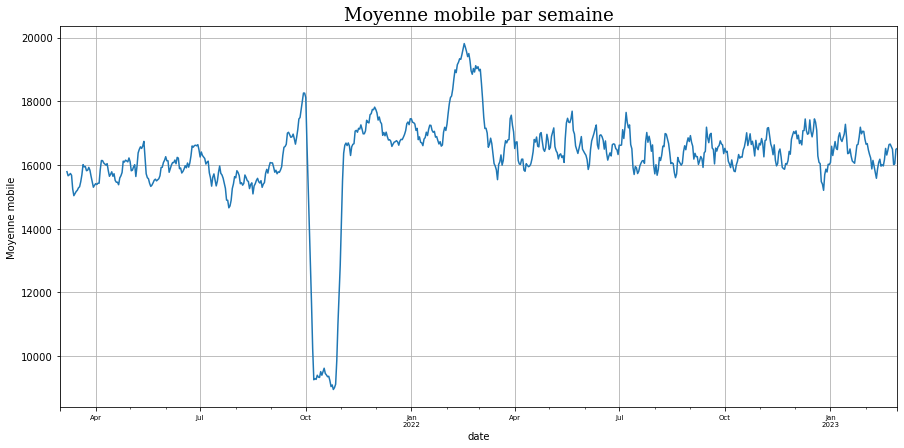

In [65]:
# Représentation graphique de la moyenne mobile par semaine 
mm_jour['md'].plot(figsize=(15,7))
plt.grid()
plt.title("Moyenne mobile par semaine", fontname='Serif', fontsize=18)
plt.ylabel("Moyenne mobile")
plt.show()

### <span style='font-family:serif'><font color='blue'> *Les moyennes mobiles ici nous nontrent qu'il n'y pas de tendance particulière sur l'évolution des prix au cours du temps*<br>

>> #### <font color='darkslateblue'> ***Moyenne mobile par trimestre***

In [66]:
#Sommer par mois les prix
mm_mois = ca_m.resample('M').sum()
mm_mois.head()

,price,categ
date,,
2021-03-31,482597.702961,11806.0
2021-04-30,476353.666829,10623.0
2021-05-31,493083.108188,11461.0
2021-06-30,484210.743414,12640.0
2021-07-31,482905.219094,13151.0


In [67]:
# Moyenne mobile par trimestre
mm_mois['mm'] = mm_mois['price'].rolling(4).mean()

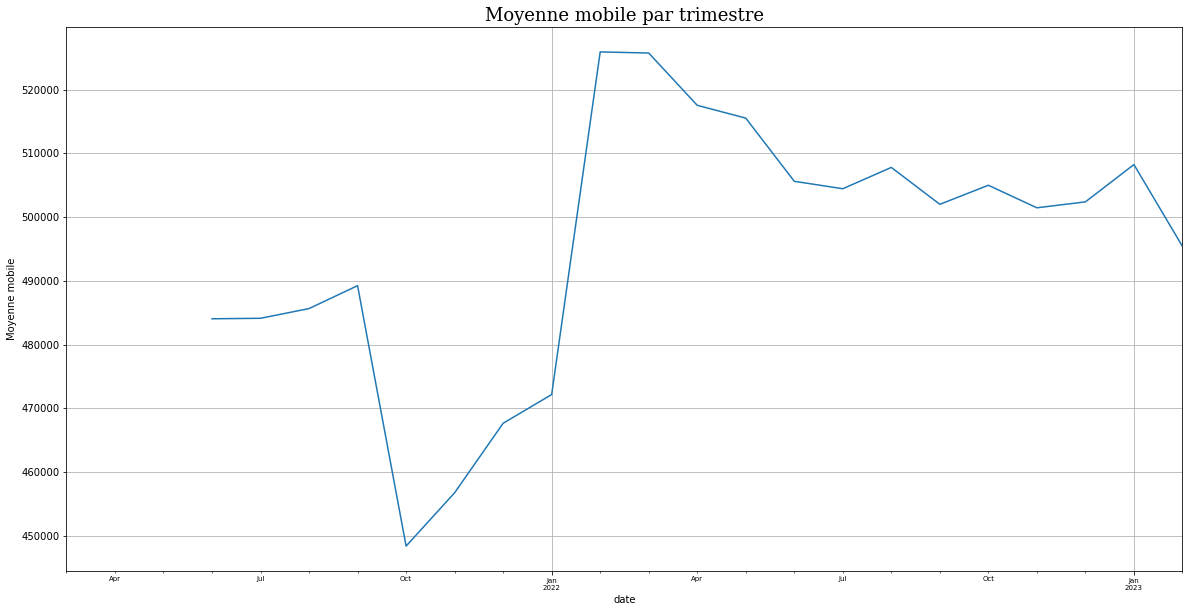

In [68]:
# Représentation graphique
mm_mois['mm'].plot(figsize=(20,10))
plt.grid()
plt.title("Moyenne mobile par trimestre", fontname='Serif', fontsize=18)
plt.ylabel("Moyenne mobile")
plt.show()

### <span style='font-family:serif'><font color='blue'> *Les moyennes mobiles ici nous nontrent qu'il n'y pas de tendance particulière sur l'évolution des prix au cours du temps*<br>

> ### <font color='lateorange'>***3. Les tops et les flops***

In [69]:
# Compter le nombre produits vendus (id_prod)
tf = datafinal['id_prod'].value_counts()

print(color.BOLD + "Les tops de nos clients:\n" + color.BLUE, tf.head(), color.END ,"\n")

print(color.BOLD + "Les flops de nos clients:\n" + color.BLUE, tf.tail(), color.END )

Les tops de nos clients:
 1_369    2252
1_417    2189
1_414    2180
1_498    2128
1_425    2096
Name: id_prod, dtype: int64  

Les flops de nos clients:
 0_1601    1
0_1151    1
0_1728    1
0_1284    1
0_1633    1
Name: id_prod, dtype: int64 


> ### <font color='lateorange'>***4. La répartition par catégorie***

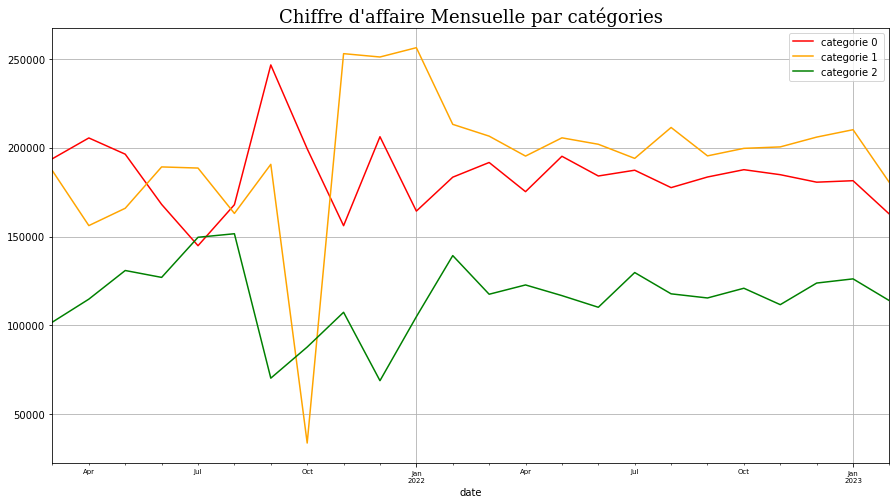

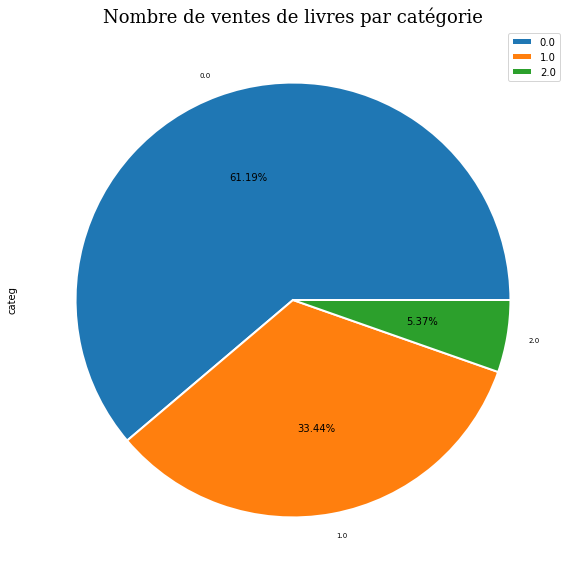

In [70]:
# CA Mensuelle par categorie
plt.figure (figsize=(15,8))
ca_m['price'].loc[ca_m['categ']==0].resample('M').sum().plot(label= 'categorie 0 ', c='red')
ca_m['price'].loc[ca_m['categ']==1].resample('M').sum().plot(label= 'categorie 1 ',c='orange')
ca_m['price'].loc[ca_m['categ']==2].resample('M').sum().plot(label= 'categorie 2 ',c='green')
plt.title("Chiffre d'affaire Mensuelle par catégories", fontname='Serif', fontsize=18)
plt.legend()
plt.grid()
plt.show()

# Représentation des ventes par catégorie (en camembert)
datafinal["categ"].value_counts().plot.pie(autopct='%.2f%%', figsize=(30,10), wedgeprops= {'linewidth' : 2, 'edgecolor' : 'white'})
plt.title("Nombre de ventes de livres par catégorie", fontname='Serif', fontsize=18)
plt.legend()
plt.show()

### <span style='font-family:serif'><font color='darkslateblue'> *Le premier graphe <font color='blue'>représente l'évolution du chiffre d'affaire pour chaque catégorie.*<br><br> <span style='font-family:serif'><font color='darkslateblue'> *Le deuxième graphe<font color='blue'>, quant à lui, représente le nombre de vente par catégorie. Ici on voit que les produits les plus vendus sont ceux du catégorie 0 et les moins vendus sont ceux du catégorie 2.*<br><br>

> ### <font color='lateorange'>***5. Le Chiffre d'affaire par clients***

In [71]:
ca_cl

,client_id,price,type_client
677,c_1609,324033.350000,pro
4388,c_4958,289760.340000,pro
6337,c_6714,153703.648641,pro
2724,c_3454,113690.294320,pro
2513,c_3263,5276.870000,lambda
...,...,...,...
4044,c_4648,11.200000,lambda
1556,c_240,11.060000,lambda
7889,c_8114,9.980000,lambda
7918,c_8140,8.300000,lambda


In [72]:
# CA par type de client
ca_type = ca_cl.groupby('type_client').agg({'price':'sum'})
ca_type = ca_type.reset_index()
ca_type

,type_client,price
0,lambda,1.097640e+07
1,pro,8.811876e+05


In [73]:
# Pourcentage du CA des clients pro
capro = ca_cl.loc[ca_cl['type_client'] == 'pro', 'price'].sum()
pro_pct = capro / ca * 100
print(color.BLUE + color.BOLD + "Le CA des 4 clients pro représentent à eux seuls, " 
      + color.RED + "%.2f" % pro_pct, "%" + color.BLUE + " du CA total.")
print(color.BLUE + color.BOLD + "Ce qui fait un CA de" + color.RED , f"{round(capro,2):,}", color.BLUE + "€ pour les tous les client pro.\n")

# Pourcentage du CA des clients lambda
calam = ca_cl.loc[ca_cl['type_client'] == 'lambda', 'price'].sum()
lam_pct = calam / ca * 100
print(color.BLUE + color.BOLD + "Le CA du reste des clients lambda représentent , " 
      + color.RED + "%.2f" % lam_pct, "%" + color.BLUE + " du CA total.")
print(color.BLUE + color.BOLD + "Ce qui fait un CA de" + color.RED , f"{round(calam,2):,}", color.BLUE + "€ pour tous les client lambda.\n")



Le CA des 4 clients pro représentent à eux seuls, 7.43 % du CA total.
Ce qui fait un CA de 881,187.63 € pour les tous les client pro.

Le CA du reste des clients lambda représentent , 92.57 % du CA total.
Ce qui fait un CA de 10,976,398.55 € pour tous les client lambda.



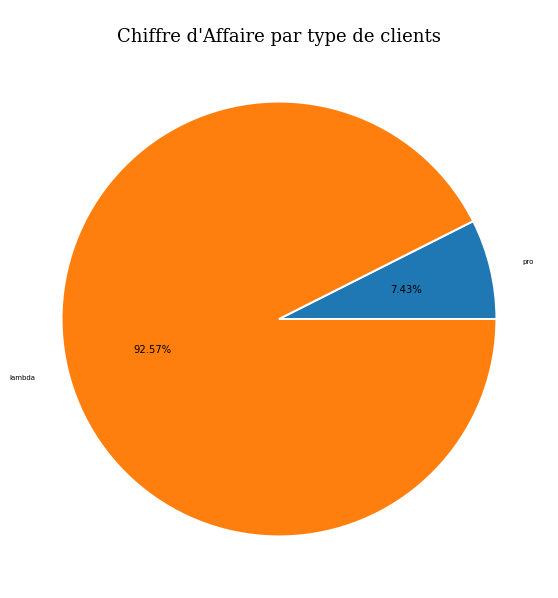

In [74]:
#diagramme de repartition 
values = [capro, calam]
names = ['pro','lambda']
plt.figure(figsize=(30,10))
plt.pie(values, labels=names, labeldistance=1.15, wedgeprops= {'linewidth' : 2, 'edgecolor' : 'white'},
        autopct = lambda x: str(round(x, 2))+ '%')
plt.title("\nChiffre d'Affaire par type de clients", fontname='Serif', fontsize=18)

plt.show()

> ### <font color='lateorange'>***6. La courbe de lorenz***

In [75]:
# Filtre sur les clients lambda
ca_client_lambda = ca_cl.loc[ca_cl['type_client'] == 'lambda',:]
ca_client_lambda.sort_values('price', ascending=False)
ca_client_lambda.head()

,client_id,price,type_client
2513,c_3263,5276.87,lambda
634,c_1570,5271.62,lambda
2108,c_2899,5214.05,lambda
1268,c_2140,5208.82,lambda
7006,c_7319,5155.77,lambda


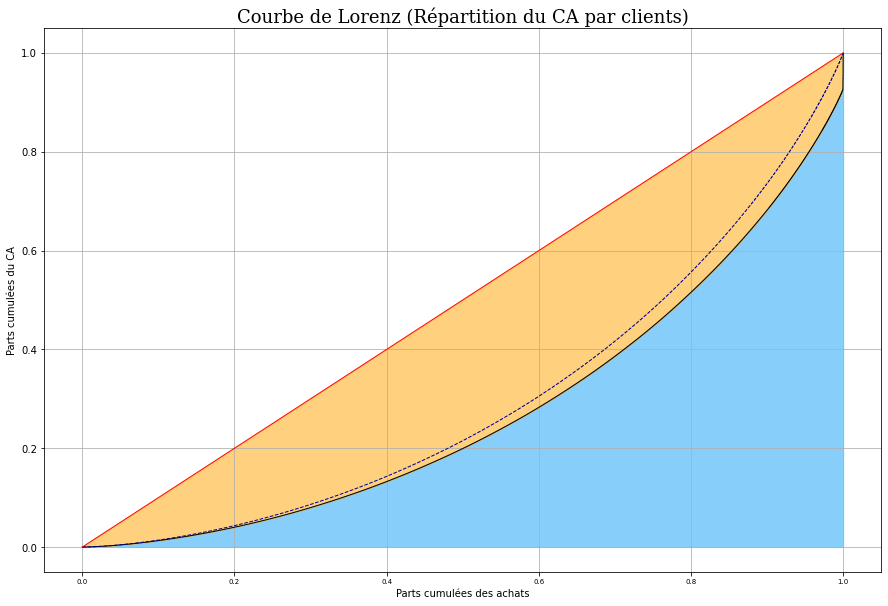

In [76]:
#courbe de lorenz
ca_clt = ca_cl[ca_cl['price'] > 0]
p = ca_clt['price'].values
n = len(p)
lorenz = np.cumsum(np.sort(p)) / p.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

# la courbe de lorenz sans les clients pro
ca_lam = ca_client_lambda[ca_client_lambda['price'].notnull()]
p2 = ca_lam['price'].values
n2 = len(p2)
lorenz2 = np.cumsum(np.sort(p2)) / p2.sum()
lorenz2 = np.append([0],lorenz2) # La courbe de Lorenz commence à 0

# Affichage de la courbe et de la droite xaxis
xaxis = np.linspace(0-1/n,1+1/n,len(lorenz))
xaxis2 = np.linspace(0-1/n2,1+1/n2,len(lorenz2))

# Traçage
plt.figure(figsize=(15,10))
plt.plot(xaxis,lorenz,drawstyle='steps-post', linewidth=1, c='black') # La courbe de lorenz principal
plt.plot(xaxis2,lorenz2,drawstyle='steps-post', linewidth=1, c='darkblue',ls='--') # La Courbe sans les pro
plt.fill_between(xaxis,lorenz,0,color='lightskyblue') # colore en bleu la surface inférieur de la courbe principale
plt.plot([0,1], [0,1], "r", linewidth=1) # Tracer la bissectrice en rouge
plt.fill_between(xaxis, xaxis, lorenz, color='orange', alpha=0.5) # Colore en orange la surface entre la bissectrice et la courbe
plt.title("Courbe de Lorenz (Répartition du CA par clients)", fontname='Serif', fontsize=18)
plt.xlabel('Parts cumulées des achats')
plt.ylabel('Parts cumulées du CA')
plt.grid()
plt.show()


### <span style='font-family:serif'><font color='blue'> *On peut en conclure une certaine équi-répartition en constatant que la courbe est plus proche de la droite. Pour appuyer sur cette idée, on va calculer l'indice de gini qui représente la valeur de l'aire entre la droite de répartiton parfaite et la coube de Lorenz.*<br>

In [77]:
# L'indice de Gini
AUC = (lorenz.sum() - lorenz[-1]/2 - lorenz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S

# L'indice de Gini sans les clients pro
AUC2 = (lorenz2.sum() - lorenz2[-1]/2 - lorenz2[0]/2)/n2 # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S2 = 0.5 - AUC2 # surface entre la première bissectrice et le courbe de Lorenz
gini2 = 2*S2

print("\n", color.BLUE + color.BOLD + "L'indice de gini est de" 
      + color.RED , f"{round(gini,2):,}", color.BLUE + " pour la courbe de lorenz principale.")
print("\n", color.BLUE + color.BOLD + "Si on enlève les clients 'pro', on obtient un indice de gini qui vaut :"
      + color.RED , f"{round(gini2,2):,}", color.BLUE + "\n")


 L'indice de gini est de 0.45  pour la courbe de lorenz principale.

 Si on enlève les clients 'pro', on obtient un indice de gini qui vaut : 0.4 



### <span style='font-family:serif'><font color='blue'> *L'indice de Gini = 0.45 nous confirme bien une rémunération égalitaire du chiffre d'affaire.*<br>

# <font color='blue'><span style='font-family:serif'>***PARTIE 2 : Demandes de Julie***

### <font color='blue'>***Pré-traitement du datafinal***<br>

In [78]:
# Colonne tranche d'âge
datafinal.loc[(datafinal['age'] <= 20), 'tranche_age'] = '18-20'
datafinal.loc[(datafinal['age'] > 21) & (datafinal['age'] <= 30), 'tranche_age'] = '21-30'
datafinal.loc[(datafinal['age'] > 31) & (datafinal['age'] <= 40), 'tranche_age'] = '31-40'
datafinal.loc[(datafinal['age'] > 41) & (datafinal['age'] <= 50), 'tranche_age'] = '41-50'
datafinal.loc[(datafinal['age'] > 51) & (datafinal['age'] <= 60), 'tranche_age'] = '51-60'
datafinal.loc[(datafinal['age'] > 60), 'tranche_age'] = '60+'

datafinal.head()

,id_prod,date,session_id,client_id,price,categ,sex,birth,age,day,year,month,ym,type_client,tranche_age
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329,11.99,0.0,f,1967,56,1,2021,March,2021March,lambda,51-60
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664,19.37,0.0,m,1960,63,1,2021,March,2021March,lambda,60+
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580,4.50,0.0,m,1988,35,1,2021,March,2021March,lambda,31-40
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912,6.55,0.0,f,1989,34,1,2021,March,2021March,lambda,31-40
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033,16.49,0.0,f,1956,67,1,2021,March,2021March,lambda,60+


In [79]:
#creation du df d'analyse
dfa = datafinal[['date','id_prod','session_id','client_id','price','categ','sex','age','tranche_age']]
dfa.head()

,date,id_prod,session_id,client_id,price,categ,sex,age,tranche_age
0,2021-03-01 00:01:07.843138,0_1259,s_1,c_329,11.99,0.0,f,56,51-60
1,2021-03-01 00:02:26.047414,0_1390,s_2,c_664,19.37,0.0,m,63,60+
2,2021-03-01 00:02:38.311413,0_1352,s_3,c_580,4.50,0.0,m,35,31-40
3,2021-03-01 00:04:54.559692,0_1458,s_4,c_7912,6.55,0.0,f,34,31-40
4,2021-03-01 00:05:18.801198,0_1358,s_5,c_2033,16.49,0.0,f,67,60+


In [80]:
# Modification des colonnes en category
dfa['tranche_age'].astype('category').cat.codes
dfa['sex'].astype('category').cat.codes
dfa['categ'].astype('category').cat.codes

# Transformation de date en mois jour
dfa['date']=dfa['date'].dt.strftime('%Y-%m')

In [81]:
# Suppression du mois d'octobre dans dfa
dfa.drop(dfa.loc[dfa['date']==2021-10].index,inplace=True)

# Suppression des 4 gros clients// potentiellement pers moral dans dfa
list_gros_clt = ['c_1609','c_6714','c_3454','c_4958']
dfa = dfa[~dfa['client_id'].isin(list_gros_clt)]
dfa.head()

,date,id_prod,session_id,client_id,price,categ,sex,age,tranche_age
0,2021-03,0_1259,s_1,c_329,11.99,0.0,f,56,51-60
1,2021-03,0_1390,s_2,c_664,19.37,0.0,m,63,60+
2,2021-03,0_1352,s_3,c_580,4.50,0.0,m,35,31-40
3,2021-03,0_1458,s_4,c_7912,6.55,0.0,f,34,31-40
4,2021-03,0_1358,s_5,c_2033,16.49,0.0,f,67,60+


> ### <font color='lateorange'>***1. Le lien entre le genre d'un client et les catégories de livres achetés <font color='darkcyan'>(Qualicatives / Qualicatives)***

### <span style='font-family:serif'><font color='green'> 2 variables qualitatives donc test d'indépendance du Khi-2.<br> <font color='red'> Condition : pas moins de 5 valeurs par cases

In [82]:
# Tri croisé
#data.pivot_table(index="categ",columns="sex",aggfunc=len)
count_data = pd.crosstab(datafinal['categ'],datafinal['sex'],margins=False)
count_data

sex,f,m
categ,,
0.0,206220,209460
1.0,114899,112270
2.0,17283,19200


In [83]:
# Tableau de contingence
Y = "categ"
X = "sex"

count = data[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
count

categ,0.0,1.0,2.0,Total
sex,,,,
f,206220,114899,17283,338402
m,209460,112270,19200,340930
Total,415680,227169,36483,679332


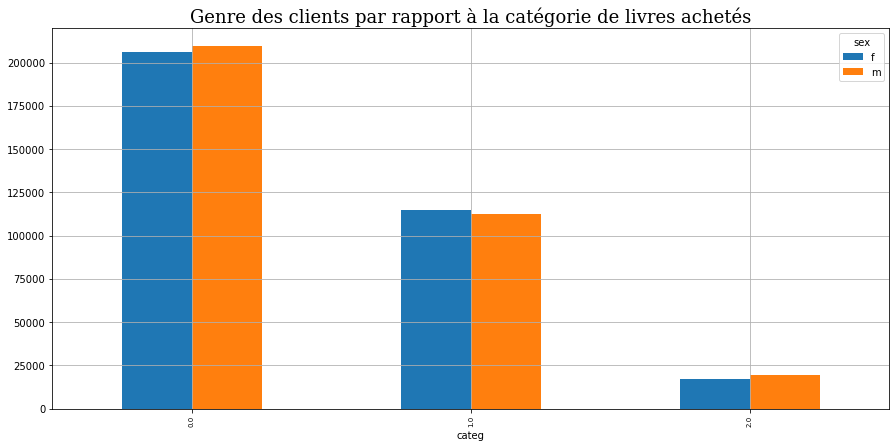

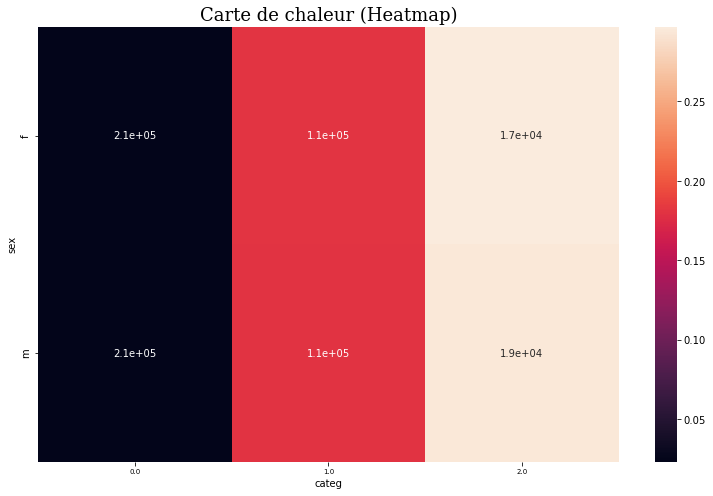

In [84]:
# Représentation graphique (en barre)
count_data.plot(kind="bar",figsize=(15,7))
plt.grid()
plt.title("Genre des clients par rapport à la catégorie de livres achetés", fontname='Serif', fontsize=18)
plt.show()


# Représentation heatmap (Carte de chaleur)
plt.figure(figsize=(13,8))

tx = count.loc[:,["Total"]]
ty = count.loc[["Total"],:]
n = len(datafinal)
indep = tx.dot(ty) / n

c = count.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.title("Carte de chaleur (Heatmap)", fontname='Serif', fontsize=18)
plt.show()

### <span style='font-family:serif'><font color='darkslateblue'>*Comme il s'agit de lien entre 2 variables Qualicatives, nous allons réaliser un test d'indépendance Khi-2.* <br>

In [102]:
#test d'independance de chi-2: relation entre 2 variables qualitatives avec stats
st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(count_data)
print(color.BOLD + color.BLUE +"\nP-Value:"+ color.RED, st_p, color.BLUE + "Khi2:"+ color.RED, st_chi2, "\n")

alpha = 0.05
if st_p <= alpha: 
    print(color.BOLD + color.BLUE +"Comme Pvalue est inférieur à alpha (0,05 soit 5%)" 
          + color.RED + " Rejet de l'hypothèse nulle") 
else: 
    print(color.BOLD + color.GREEN +
          "Comme Pvalue est supérieur à alpha (0,05 soit 5%) ,Acceptation de l'hypothese null")


P-Value: 1.1989607410166063e-32 Khi2: 147.00253568681114 

Comme Pvalue est inférieur à alpha (0,05 soit 5%) Rejet de l'hypothèse nulle


### <span style='font-family:serif'><font color='darkslateblue'>*Il y a donc correlation entre le genre des clients et la catégorie de livre achetés.*<br>

> ### <font color='lateorange'>***2. Le lien entre l'âge des clients et le montant total <font color='darkcyan'>(Quantives / Quantives)***

### <span style='font-family:serif'><font color='green'>2 variables quantitatives.<br> <font color='red'>Condition: lien linéaire, distribution normale et pas de données extrêmes.<br> <font color='green'>On peut effectuer un test de correlation linéaire Pearson. <br>

In [86]:
tot_ca_clt = dfa.groupby(['client_id'],as_index = False).agg({'price':sum,'age':max})
tot_ca_clt.head()

,client_id,price,age
0,c_1,558.18,68
1,c_10,1353.60,67
2,c_100,254.85,31
3,c_1000,2261.89,57
4,c_1001,1812.86,41


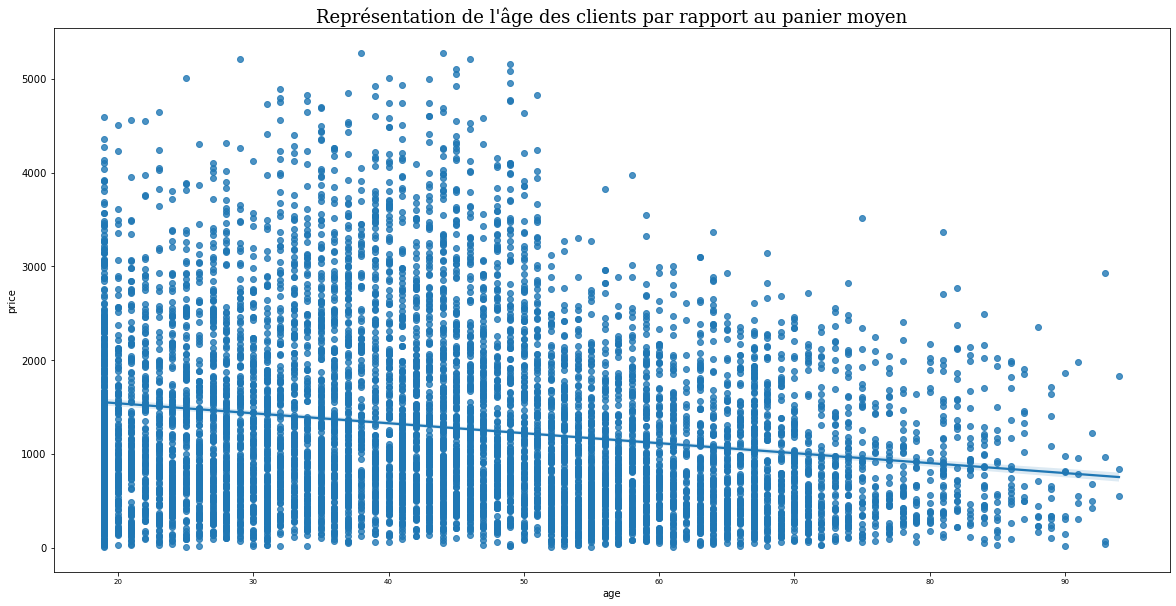

In [87]:
# Représentation graphique (regplot)
plt.figure(figsize= (20,10))
sns.regplot(data= tot_ca_clt, x='age',y='price')
plt.title("Représentation de l'âge des clients par rapport au panier moyen", fontname='Serif', fontsize=18)
plt.show()

### <span style='font-family:serif'><font color='darkcyan'>*le regplot plot est une fonction de seaborn qui génère la droite de regression. sinon la premiere idée était un scatterplot sur laquelle on trace la droite de regression. On peut affirmer une petite relation entre le montant des achats par client et leur age.*

In [88]:
#matrice de correlation
mycor = tot_ca_clt.corr()
print(color.BOLD + color.BLUE, mycor)
#test correlation de PEARSON: relation entre 2 variables quantitatives avec stats
mycor, pval = st.pearsonr(tot_ca_clt['age'], tot_ca_clt['price'])
print(color.BOLD + color.GREEN + "p-val:", pval)

           price       age
price  1.000000 -0.188294
age   -0.188294  1.000000
p-val: 1.964105610599107e-69


### <span style='font-family:serif'><font color='darkslateblue'>*Le coefficient de pearson est très proche de 0, l'hypothèse nulle est donc rejeté. Il a une correlation entre les deux variables et la P-val < 0 nous confirme la relation de pente négative donc plus les personnes sont agées moins elles achetent.*

> ### <font color='lateorange'>***3. Le lien entre l'âge des clients et la fréquence d'achat <font color='darkcyan'>(Qualitatives / Quantives)***

In [89]:
#creation df compte du nb d'achat par client
df_client_freq_achat = dfa[['client_id', 'session_id']].groupby(by='client_id').count()
#creation client et tranche d'age
df_client_age = pd.DataFrame(dfa[['client_id', 'tranche_age']].drop_duplicates())
#fusion des df sur client
nb_achat = pd.merge(df_client_freq_achat, df_client_age, how="inner", on=['client_id'])
nb_achat.reset_index()

,index,client_id,session_id,tranche_age
0,0,c_1,39,60+
1,1,c_10,58,60+
2,2,c_100,8,NaN
3,3,c_1000,125,51-60
4,4,c_1001,102,NaN
...,...,...,...,...
8591,8591,c_995,14,60+
8592,8592,c_996,95,51-60
8593,8593,c_997,59,21-30
8594,8594,c_998,53,21-30


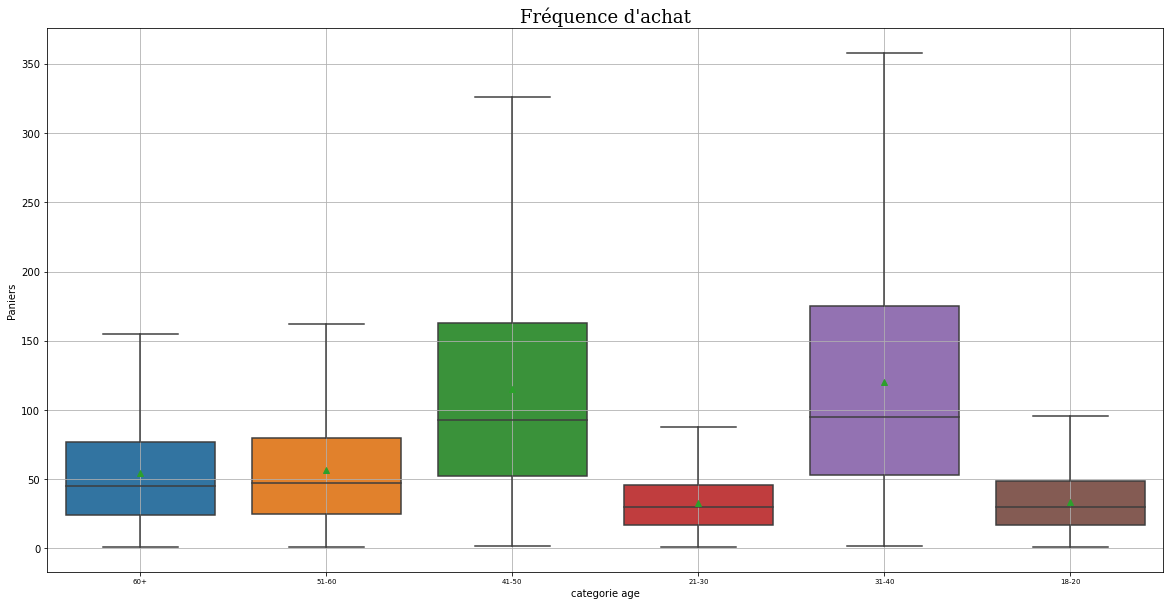

In [90]:
# Représentation Boxplot
plt.figure(figsize=(20,10))
sns.boxplot(x="tranche_age", y="session_id", data=nb_achat, showfliers=False,showmeans=True)
plt.xlabel("categorie age")
plt.ylabel("Paniers")
plt.title("Fréquence d'achat", fontname='Serif', fontsize=18)
plt.grid()
plt.show()

In [91]:
# Test de normalité de Shapiro
st.shapiro(nb_achat.session_id)

ShapiroResult(statistic=0.8149591684341431, pvalue=0.0)

### <span style='font-family:serif'><font color='green'>*Normalité non validé donc test non paramétrique avec Kruskal.* <br>

In [92]:
# Test non parametrique Kruskal-Wallis avec pingouin
# Test kruskal avec pingouin 
pg.kruskal(dv='session_id', between='tranche_age', data=nb_achat, detailed=True)

,Source,ddof1,H,p-unc
Kruskal,tranche_age,5,2234.155787,0.0


### <span style='font-family:serif'><font color='darkslateblue'>*Il y a correlation entre les 2 variables : le rejet de H0 affirme donc la correlation entre la categorie d'age de l'acheteur et sa frequence d'achat* <br>

> ### <font color='lateorange'>***4. Le lien entre l'âge des clients et la taille du panier moyen <font color='darkcyan'>(Quantives / Quantives)***

In [93]:
#on compte le nombre de produit par panier
panier = dfa.groupby(['session_id'],as_index=True).agg({'id_prod':'count','tranche_age':max})
panier.reset_index()

,session_id,id_prod,tranche_age
0,s_1,1,51-60
1,s_10,1,51-60
2,s_100,2,41-50
3,s_1000,4,31-40
4,s_10000,3,31-40
...,...,...,...
319269,s_99994,3,31-40
319270,s_99995,1,60+
319271,s_99996,4,41-50
319272,s_99997,1,41-50


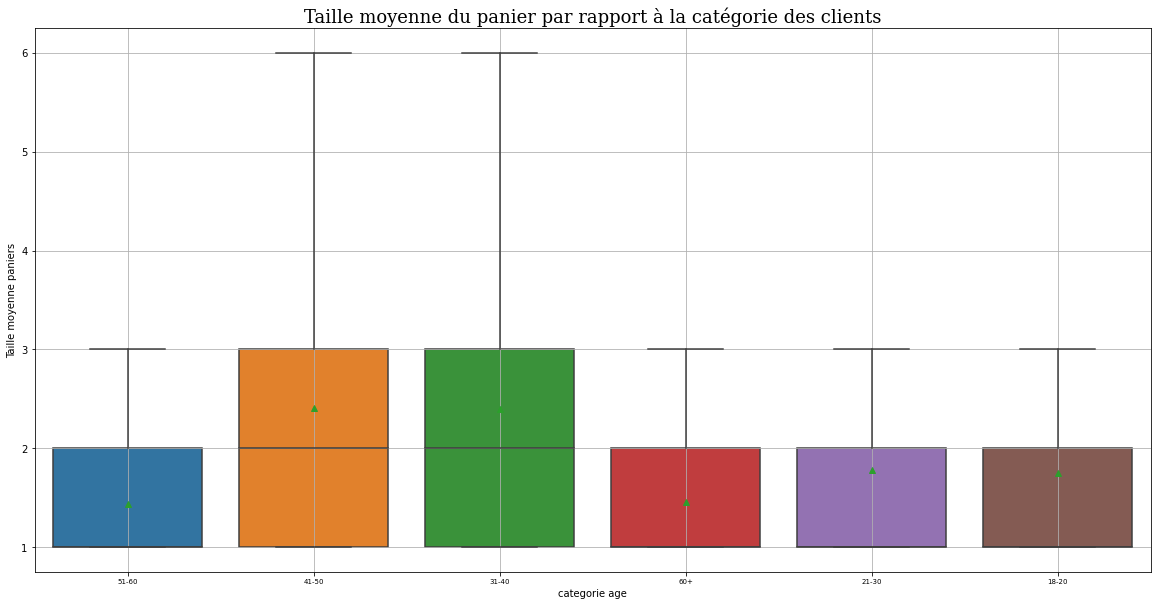

In [94]:
plt.figure(figsize= (20,10))
sns.boxplot(x='tranche_age', y='id_prod', data= panier,showfliers = False, showmeans=True)
plt.xlabel("categorie age")
plt.ylabel("Taille moyenne paniers")
plt.title("Taille moyenne du panier par rapport à la catégorie des clients", fontname='Serif', fontsize=18)
plt.grid()
plt.show()

### <span style='font-family:serif'><font color='darkcyan'>Test entre  deux variables quantitatives :
<span style='font-family:serif'><font color='green'>Pour un test entre une variable quantitative et une variable qualitative, 2 possibilités s'offrent nous: un test parametrique ou non parametrique.

<span style='font-family:serif'><font color='green'>.un test parametrique est plus mais nécessite des conditions d'applications contraignantes<br>
<span style='font-family:serif'><font color='green'>.un test non paramétrique a un champs d'application plus vaste mais le résultat est moins souvent documenté<br>
<span style='font-family:serif'><font color='green'>Pour un test parametrique, l'anova est préconisé mais des tests sur les variables sont effectués afin de respecter les conditions suivantes:<font color='darkslateblue'>distribution normal,indépendence entre les données,pas de données extrêmes,homoscédasticité ou variances des groupes à peu pres égales,effectifs par classes à peu près égaux.

In [95]:
#controle de normalité d' Agostino
stat, p = st.normaltest(panier.id_prod,axis=0)
print(stat, p)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
  print(color.BOLD + color.RED +'Sample looks Gaussian (fail to reject H0)')
else:
  print(color.BOLD + color.RED +'Sample does not look Gaussian (reject de H0)')

100609.54242888503 0.0
Statistics=100609.542, p=0.000
Sample does not look Gaussian (reject de H0)


### <span style='font-family:serif'><font color='green'>*Les conditions de normalité n'étant pas remplis, on va donc effectuer un test non paramétrique de kruskal-Wallis afin de vérifier les condition suivantes : HO = pas de corrélation et H1 = corrélation entre âge et panier moyenne .* <br>

In [96]:
# les valeurs par tranche d'âge des clients
grps = pd.unique(panier.tranche_age.values)
print(color.BOLD + color.RED ,grps)
d_data = {grp:panier['id_prod'][panier.tranche_age == grp] for grp in grps}
print(color.BOLD + color.BLUE , d_data)

 ['51-60' '41-50' '31-40' '60+' '21-30' nan '18-20']
 {'51-60': session_id
s_1         1
s_10        1
s_100021    2
s_100040    1
s_100044    1
           ..
s_99929     1
s_99944     1
s_99969     1
s_99977     1
s_99981     1
Name: id_prod, Length: 51546, dtype: int64, '41-50': session_id
s_100       2
s_100003    3
s_100004    1
s_100007    1
s_100008    1
           ..
s_99983     1
s_99989     1
s_99996     4
s_99997     1
s_99998     3
Name: id_prod, Length: 75415, dtype: int64, '31-40': session_id
s_1000      4
s_10000     3
s_100000    1
s_100011    1
s_100015    1
           ..
s_99959     1
s_99966     2
s_9998      1
s_9999      3
s_99994     3
Name: id_prod, Length: 73213, dtype: int64, '60+': session_id
s_100005    1
s_10003     1
s_100030    1
s_10004     1
s_100046    1
           ..
s_99971     1
s_99986     1
s_99991     1
s_99993     1
s_99995     1
Name: id_prod, Length: 61754, dtype: int64, '21-30': session_id
s_100017    1
s_10002     1
s_100085    1
s_100089    1

In [97]:
# Test non parametrique Kruskal-Wallis avec stats
#kstat, pval = st.kruskal(d_data['18-20'], d_data['21-30'], d_data['31-40'],d_data['41-50'],d_data['51-60'],d_data['60+'])

# Récupérer la p-value
#print(color.BOLD + color.BLUE , pval) # Si pval petit (au moins inférieure à 0.05, alors on peut parler de différence significative

In [98]:
#test kruskal avec pingouin
import pingouin as pg
pg.kruskal(dv='id_prod', between='tranche_age', data=panier, detailed=True)

,Source,ddof1,H,p-unc
Kruskal,tranche_age,5,56722.942117,0.0


### <span style='font-family:serif'><font color='darkslateblue'>*Pour les deux tests identiques, l'hypothèse nulle est rejeté donc il semblerait qu'il y ait bien une relation entre la quantité acheté et la tranche d'age de l'acheteur.* <br>

> ### <font color='lateorange'>***5. Le lien entre l'âge des clients et les catégories des livres achetés <font color='darkcyan'>(Qualitaves / Qualitatives)***

### <span style='font-family:serif'><font color='green'>*2 variables qualitatives donc test d'indépendance du Khi.<br> <font color='red'>Condition: pas moins de 5 valeurs par cases.* <br>

In [99]:
#tableau de contingence à travers un pivot table
X2 = "tranche_age"
Y2 = "categ"
contcat = datafinal[[X2, Y2]].pivot_table(index=X2, columns=Y2, aggfunc=len,margins=True,margins_name="Total")
contcat


categ,0.0,1.0,2.0,Total
tranche_age,,,,
18-20,4327,7397,7796,19520
21-30,10110,18631,21193,49934
31-40,133981,41004,642,175627
41-50,158259,48259,674,207192
51-60,40050,49090,975,90115
60+,39338,49983,840,90161
Total,386065,214364,32120,632549


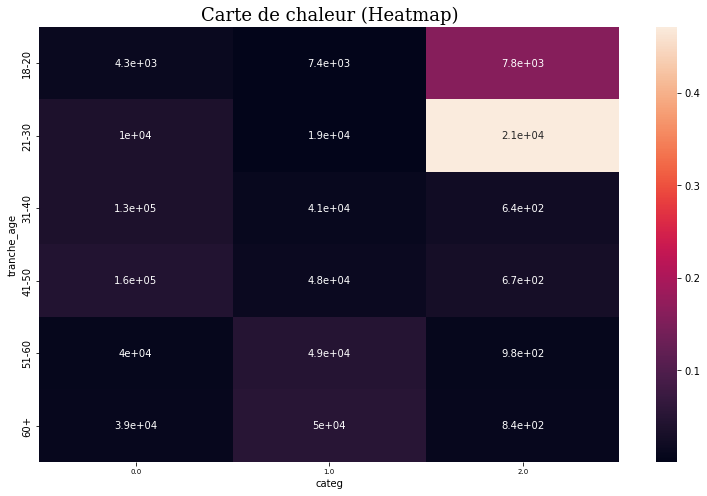

In [100]:
# Représentation heatmap (Carte de chaleur)
plt.figure(figsize=(13,8))

tx = contcat.loc[:,["Total"]]
ty = contcat.loc[["Total"],:]
n2 = len(datafinal)
indep2 = tx.dot(ty) / n2

c2 = contcat.fillna(0) # On remplace les valeurs nulles par 0
measure2 = (c2-indep2)**2/indep2
xi_n2 = measure2.sum().sum()
table2 = measure2/xi_n2
sns.heatmap(table2.iloc[:-1,:-1],annot=c2.iloc[:-1,:-1])
plt.title("Carte de chaleur (Heatmap)", fontname='Serif', fontsize=18)
plt.show()

In [101]:
#test d'independance de chi-2: relation entre 2 variables qualitatives avec stats
st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(contcat)
print("\n", 'P-Value:', st_p, 'Khi2:', st_chi2, "\n")

alpha = 0.05
if st_p <= alpha: 
    print(color.BOLD + color.BLUE +"Comme Pvalue est inférieur à alpha (0,05 soit 5%)" 
          + color.RED + " Rejet de l'hypothèse nulle") 
else: 
    print(color.BOLD + color.GREEN +
          "Comme Pvalue est supérieur à alpha (0,05 soit 5%) ,Acceptation de l'hypothese null")


 P-Value: 0.0 Khi2: 284969.7680623947 

Comme Pvalue est inférieur à alpha (0,05 soit 5%) Rejet de l'hypothèse nulle


### <span style='font-family:serif'><font color='darkslateblue'>*Il y a correlation entre l'âge des clients (tranche d'âge) et la catégorie de livre achetés.*<br><br>

## <span style='font-family:serif'><font color='darkcyan'><span style='background:cyan'>*CONCLUSIONS ET OBSERVATIONS*

## <span style='font-family:serif'><font color='darkslateblue'>*Il peut être intéressant de se pencher sur les achats de produits groupés en proposant des offres un peu plus incitatives.*<br><br><span style='font-family:serif'><font color='darkslateblue'>*Il faudrait évaluer le bénéfice potentiel d’une augmentation de la proportion de produits de catégorie 2.*<br><br><span style='font-family:serif'><font color='darkslateblue'>*Puis il peut être intéressant de cibler un peu plus les clients de moins de 40 ans.*<br><br><span style='font-family:serif'><font color='darkslateblue'>*Enfin, nous devrions collecter dans nos bases de données des informations un peu plus approfondies sur les clients comme :<font color='darkcyan'> la zone géographique, date d'inscription, professions et autres<font color='darkslateblue'> et sur les produits comme :<font color='darkcyan'> date de sortie d'achats, tomes etc.*<br><br><span style='font-family:serif'><font color='darkslateblue'>*Mais on pourrait aussi comparer le comportement d'achats des clients en ligne et hors ligne en mettant un focus sur les clients qui utilisent les deux modes d'achats.*<br>

# <font color='white'><span style='background:darkcyan'> ***LAPAGE.END*** <span><br>